# Google Vision Api ile Resim İşlemleri

Gerekli Yüklemeler:

pip install --upgrade google-cloud-vision

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "apikey.json"
# apikey.json dosyası bilgisayar her açıldığında ortam değişkenlerine eklenmelidir
# ancak bu işlemi bu os.environ[] koduyla kolayca yapabilmekteyiz

# Google vision kütüphanelerini de import ediyoruz
from google.cloud import vision
from google.cloud.vision import types
from PIL import Image, ImageDraw

In [4]:
def display_image(img_name):
    img = mpimg.imread(img_name)
    imgplot = plt.imshow(img)
    plt.show()

# Resim Analizi

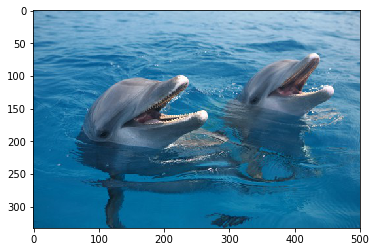

Vertebrate
Common bottlenose dolphin
Marine mammal
Dolphin
Bottlenose dolphin
Short-beaked common dolphin
Cetacea
Marine biology
Tucuxi
Rough-toothed dolphin


In [5]:
client = vision.ImageAnnotatorClient() # biz istemci olduğumuz için istemci nesnesi oluşturuyoruz

resim_yolu = "resim.jpg"
with io.open(resim_yolu, 'rb') as image_file:
    img = image_file.read()

image = types.Image(content=img) # resmi kütüphanelerin belleğine yüklüyoruz

# Yüklenen resimden objeler, yerler, aktiviteler, hayvan türleri, ürünler ve dahasını çıkarabiliyoruz
response = client.label_detection(image=image) # cevap alacağımız değişkeni oluşturup resmi analiz ettiriyoruz

display_image(resim_yolu)
# etiketleri ekrana yazdıralım
for label in response.label_annotations:
    print(label.description)

# Resimden Yazı Tanıma

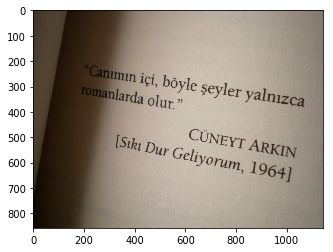

Canımın içi, böyle şeyler yalnızca
romanlarda olur."
40
CÜNEYT ARKIN
[Stki Dur Geliyorum, 1964

Canımın
içi,
böyle
şeyler
yalnızca
romanlarda
olur."
40
CÜNEYT
ARKIN
[Stki
Dur
Geliyorum,
1964


In [10]:
client = vision.ImageAnnotatorClient()

resim_yolu = "resim2.jpg"
with io.open(resim_yolu, 'rb') as image_file:
    img = image_file.read()

image = types.Image(content=img)

response = client.text_detection(image=image)

display_image(resim_yolu)
for text in response.text_annotations:
    print(text.description)